# Naive Bayes

In [15]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB

## Base risco de crédito 

In [2]:
base_risco_credito = pd.read_csv('../data/risco_credito.csv')

In [3]:
base_risco_credito

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


In [6]:
X_risco_credito = base_risco_credito.iloc[:, 0:4].values
X_risco_credito

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [8]:
y_risco_credito = base_risco_credito.iloc[:, 4].values
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

### Label Encoder

In [11]:
from sklearn.preprocessing import LabelEncoder
label_enconder = LabelEncoder()

X_risco_credito[:, 0] = label_enconder.fit_transform(X_risco_credito[:, 0])
X_risco_credito[:, 1] = label_enconder.fit_transform(X_risco_credito[:, 1])
X_risco_credito[:, 2] = label_enconder.fit_transform(X_risco_credito[:, 2])
X_risco_credito[:, 3] = label_enconder.fit_transform(X_risco_credito[:, 3])
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [14]:
import pickle

with open('../data-pickles/risco_credito.pkl', mode = 'wb') as file:
    pickle.dump(X_risco_credito, file)

In [16]:
naive_risco_credito = GaussianNB()
naive_risco_credito.fit(X_risco_credito, y_risco_credito)

GaussianNB()

In [21]:
# historia boa (0), divida alta (0), garantias nenhuma (1), renda >35 (2)
# historia ruim (2), divida alta (0), garantias adequada (0), renda <15 (0)
previsao = naive_risco_credito.predict([[0, 0, 1, 2], [2, 0, 0, 0]])
previsao

array(['baixo', 'moderado'], dtype='<U8')

In [22]:
naive_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [23]:
naive_risco_credito.class_count_

array([6., 5., 3.])

## Base credit data

In [25]:
with open('../data-pickles/credit.pkl', mode = 'rb') as file:
    X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(file)

In [27]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [29]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [31]:
naive_credit = GaussianNB()
naive_credit.fit(X_credit_treinamento, y_credit_treinamento)

GaussianNB()

In [36]:
previsoes_credit = naive_credit.predict(X_credit_teste)

In [37]:
previsoes_credit

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [38]:
from sklearn.metrics import accuracy_score # faz a contagem de acertos
accuracy_score(y_credit_teste, previsoes_credit)

0.938

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_credit_teste, previsoes_credit)

array([[428,   8],
       [ 23,  41]])

0.938

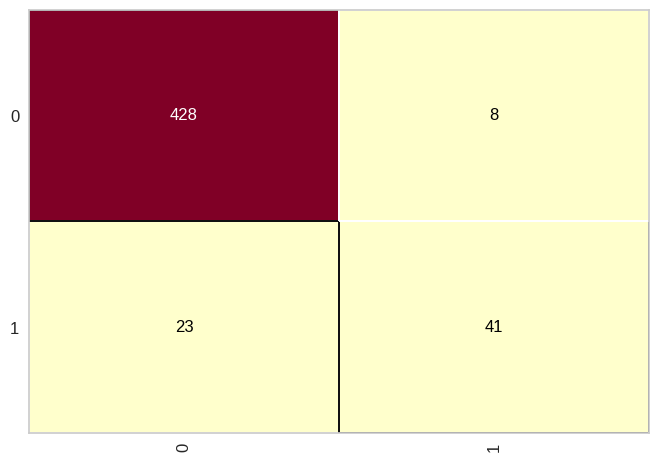

In [45]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(naive_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_credit_teste, previsoes_credit))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



# Base census

In [56]:
with open('../data-pickles/census.pkl', 'rb') as file:
    X_census_treinamento, y_census_treinamento, X_census_testes, y_census_teste = pickle.load(file)
    
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 116), (27676,))

In [57]:
X_census_testes.shape, y_census_teste.shape

((4885, 116), (4885,))

In [58]:
naive_census = GaussianNB()
naive_census.fit(X_census_treinamento, y_census_treinamento)

GaussianNB()

In [59]:
previsoes_census = naive_census.predict(X_census_testes)

In [60]:
accuracy_score(y_census_teste, previsoes_census)

0.41985670419651994

0.41985670419651994

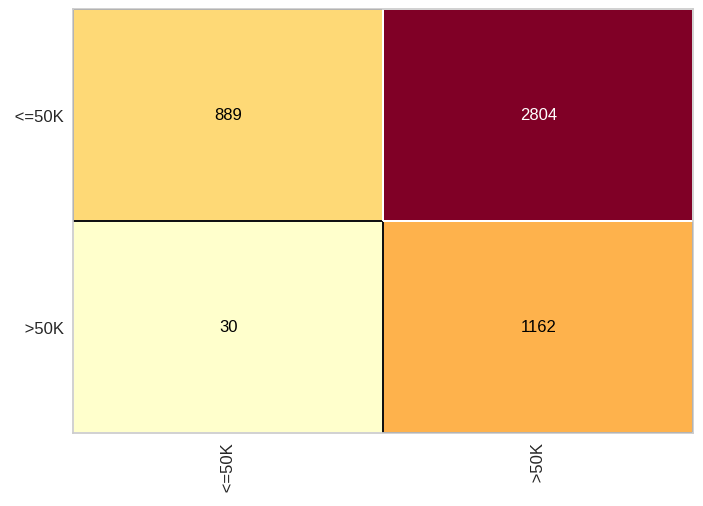

In [61]:
cm = ConfusionMatrix(naive_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_testes, y_census_teste)

In [62]:
print(classification_report(y_census_teste, previsoes_census))

              precision    recall  f1-score   support

       <=50K       0.97      0.24      0.39      3693
        >50K       0.29      0.97      0.45      1192

    accuracy                           0.42      4885
   macro avg       0.63      0.61      0.42      4885
weighted avg       0.80      0.42      0.40      4885

